In [ ]:
#Plots 4 bootstrapped or Monte Carlo Simulated poles

In [1]:
import pandas as pd
import math 
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fnmatch
import statistics
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

ModuleNotFoundError: No module named 'pmagpy'

In [8]:
# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat, dlon = lat2_rad - lat1_rad, lon2_rad - lon1_rad
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Read latitude and longitude pairs from CSV files
def read_csv(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            lat, lon = float(row[0]), float(row[1])
            data.append([lat, lon])
    return np.array(data)

# Load data arrays from CSV files
data_array1 = read_csv('c:\\users\\jmeer\\harohalliMay28.csv')
data_array2 = read_csv('c:\\users\\jmeer\\xiaboot.txt')
data_array3 = read_csv('c:\\users\\jmeer\\chengboot.txt')
data_array4 = read_csv('c:\\users\\jmeer\\malaniMay27.txt')

# Calculate the great circle distance between each pair of coordinates
distances = np.zeros(data_array1.shape[0])
distances2= np.zeros(data_array1.shape[0])
distances3= np.zeros(data_array1.shape[0])
for i in range(data_array1.shape[0]):
    lat1, lon1 = data_array1[i]
    lat2, lon2 = data_array2[i]
    lat3, lon3 = data_array3[i]
    lat4, lon4 = data_array4[i]
    distances[i] = haversine(lat1, lon1, lat2, lon2)
    distances2[i]= haversine(lat2, lon2, lat3, lon3)
    distances3[i]= haversine(lat3, lon3, lat4, lon4)
output_file_path = 'distances.txt'
with open(output_file_path, 'w') as output_file:
    for number in distances:
        output_file.write(str(number) + '\n')
output_file_path = 'distances2.txt'
with open(output_file_path, 'w') as output_file:
    for number in distances:
        output_file.write(str(number) + '\n')
output_file_path = 'distances3.txt'
with open(output_file_path, 'w') as output_file:
    for number in distances:
        output_file.write(str(number) + '\n')


73.62 Mean Paleolatitude
3.93 Standard Deviation


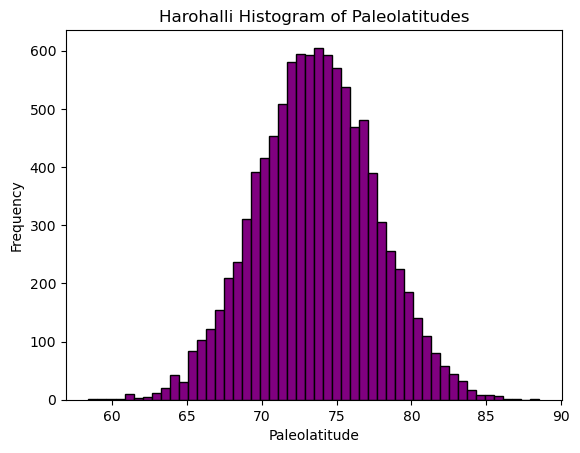

10000 plats saved in plat_1f.txt


<Figure size 640x480 with 0 Axes>

In [3]:
#Paleolatitude Group 1

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles

def plot_histogram(paleolatitudes, bins=50):
    plt.hist(paleolatitudes, bins=bins, color='purple', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('Harohalli Histogram of Paleolatitudes')
    plt.show()

# Example usage:
file_path = 'c:\\Users\\jmeer\\harohalliMay28.csv'
site_lat = 21.1
site_lon = 79.1

poles = read_poles_from_file(file_path)
paleolatitudes = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y1=statistics.mean(paleolatitudes)
z1=statistics.stdev(paleolatitudes)
print("{:.2f}".format(y1),"Mean Paleolatitude")
print("{:.2f}".format(z1),"Standard Deviation")
plot_histogram(paleolatitudes)
#####Put Figure File save location next####
plt.savefig('platgroup1.svg')
#save the paleolatitude file
# Save the random numbers to a text file
# Save the random numbers to a text file
output_file_path = 'plat_1f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes:
        output_file.write(str(number) + '\n')

print(f'10000 plats saved in {output_file_path}')


52.35 Mean Paleolatitude
2.70 Standard Deviation


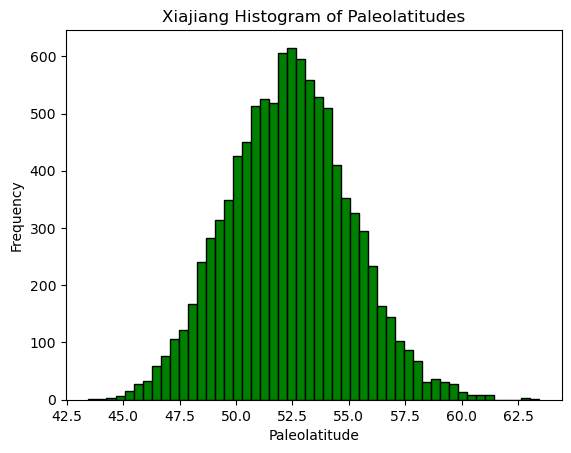

10000 plats saved in plat_2f.txt


<Figure size 640x480 with 0 Axes>

In [4]:
#Paleolatitude Group 2

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles
#####Put Figure File save location below####
def plot_histogram(paleolatitudes2, bins=50):
    plt.hist(paleolatitudes2, bins=bins, color='green', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('Xiajiang Histogram of Paleolatitudes')
    plt.show()
    plt.savefig('platgroup2.svg')

# Reference location usage:
file_path = 'c:\\Users\\jmeer\\xiaboot.txt'
site_lat = 21.1
site_lon = 79.1

poles = read_poles_from_file(file_path)
paleolatitudes2 = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y2=statistics.mean(paleolatitudes2)
z2=statistics.stdev(paleolatitudes2)
print("{:.2f}".format(y2),"Mean Paleolatitude")
print("{:.2f}".format(z2),"Standard Deviation")
#save in file
plot_histogram(paleolatitudes2)
output_file_path = 'plat_2f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes2:
        output_file.write(str(number) + '\n')

print(f'10000 plats saved in {output_file_path}')

27.50 Mean Paleolatitude
2.23 Standard Deviation


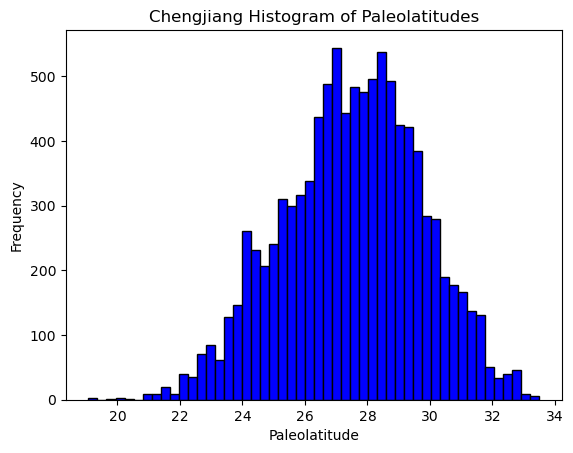

10000 plats saved in plat_3f.txt


<Figure size 640x480 with 0 Axes>

In [5]:
#Paleolatitude Group 3

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles
#####Put Figure File save location below####
def plot_histogram(paleolatitudes3, bins=50):
    plt.hist(paleolatitudes3, bins=bins, color='blue', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('Chengjiang Histogram of Paleolatitudes')
    plt.show()
    plt.savefig('platgroup3.svg')

# Reference location usage:
file_path = 'c:\\Users\\jmeer\\chengboot.txt'
site_lat = 21.1
site_lon = 79.1

poles = read_poles_from_file(file_path)
paleolatitudes3 = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y3=statistics.mean(paleolatitudes3)
z3=statistics.stdev(paleolatitudes3)
print("{:.2f}".format(y3),"Mean Paleolatitude")
print("{:.2f}".format(z3),"Standard Deviation")
#save in file
plot_histogram(paleolatitudes3)
output_file_path = 'plat_3f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes3:
        output_file.write(str(number) + '\n')

print(f'10000 plats saved in {output_file_path}')

41.63 Mean Paleolatitude
2.34 Standard Deviation


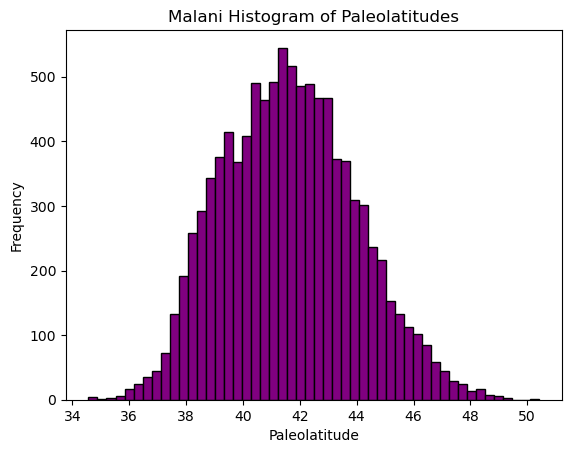

10000 plats saved in plat_4f.txt


<Figure size 640x480 with 0 Axes>

In [9]:
#Paleolatitude Group 4

def calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon):
    pole_lat_rad = math.radians(pole_lat)
    pole_lon_rad = math.radians(pole_lon)
    site_lat_rad = math.radians(site_lat)
    site_lon_rad = math.radians(site_lon)

    paleolat_rad = math.asin(math.sin(pole_lat_rad) * math.sin(site_lat_rad) + \
                             math.cos(pole_lat_rad) * math.cos(site_lat_rad) * math.cos(pole_lon_rad - site_lon_rad))

    paleolat = math.degrees(paleolat_rad)
    return paleolat

def read_poles_from_file(file_path):
    poles = []
    with open(file_path, 'r') as file:
        for line in file:
            pole_lat, pole_lon = map(float, line.strip().split(','))
            poles.append((pole_lat, pole_lon))
    return poles

def plot_histogram(paleolatitudes, bins=50):
    plt.hist(paleolatitudes, bins=bins, color='purple', edgecolor='k')
    plt.xlabel('Paleolatitude')
    plt.ylabel('Frequency')
    plt.title('Malani Histogram of Paleolatitudes')
    plt.show()

# Example usage:
file_path = 'c:\\Users\\jmeer\\malaniMay27.txt'
site_lat = 21.1
site_lon = 79.1

poles = read_poles_from_file(file_path)
paleolatitudes = [calculate_paleolatitude(pole_lat, pole_lon, site_lat, site_lon) for pole_lat, pole_lon in poles]
y1=statistics.mean(paleolatitudes)
z1=statistics.stdev(paleolatitudes)
print("{:.2f}".format(y1),"Mean Paleolatitude")
print("{:.2f}".format(z1),"Standard Deviation")
plot_histogram(paleolatitudes)
#####Put Figure File save location next####
plt.savefig('platgroup4.svg')
#save the paleolatitude file
# Save the random numbers to a text file
# Save the random numbers to a text file
output_file_path = 'plat_4f.txt'
with open(output_file_path, 'w') as output_file:
    for number in paleolatitudes:
        output_file.write(str(number) + '\n')

print(f'10000 plats saved in {output_file_path}')


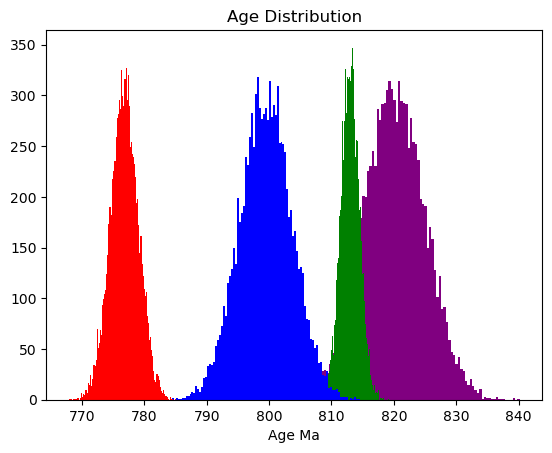

10000 ages ages_1f.txt
10000 ages ages_2f.txt
10000 ages rate6.txt


In [10]:
#Generate Gaussian Age distributions for each pole
age1_mean=820
st_dev1=5
age2_mean=813.0
st_dev2=1.5
age3_mean=799.5
st_dev3=4.2
age4_mean=776.8
st_dev4=2.25
age_1f=np.random.normal(age1_mean, st_dev1, 10000)
age_2f=np.random.normal(age2_mean, st_dev2, 10000)
age_3f=np.random.normal(age3_mean, st_dev3, 10000)
age_4f=np.random.normal(age4_mean, st_dev4, 10000)
#Calculate 1st age differences
agedif=abs(age_1f-age_2f)
rate=(distances/agedif)
rate2=rate/10
#calculate 2nd age difference
agedif2=abs(age_2f-age_3f)
rate3=(distances2/agedif2)
rate4=rate3/10
#calculate 3nd age difference
agedif3=abs(age_3f-age_4f)
rate5=(distances3/agedif3)
rate6=rate5/10
#age histogram
# Create histogram
plt.hist(age_1f, color = "purple", bins=100)
plt.hist(age_2f, color="green", bins=100)
plt.hist(age_3f, color="blue", bins=100)
plt.hist(age_4f, color="red", bins=100)
# Set title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age Ma')
#####Put Figure File save location next####
plt.savefig('GaussAge.svg')
# Display the histogram
plt.show()
#save the age 1  files
output_file_path = 'ages_1f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_1f:
        output_file.write(str(number) + '\n')

print(f'10000 ages {output_file_path}')
#save the age 2 files
output_file_path = 'ages_2f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_2f:
        output_file.write(str(number) + '\n')

print(f'10000 ages {output_file_path}')
#save the age 3 files
output_file_path = 'ages_3f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_3f:
        output_file.write(str(number) + '\n')
#save the age 4 files
output_file_path = 'ages_4f.txt'
with open(output_file_path, 'w') as output_file:
    for number in age_4f:
        output_file.write(str(number) + '\n')
################
#save the rate files
output_file_path = 'rate2.txt'
with open(output_file_path, 'w') as output_file:
    for number in rate2:
        output_file.write(str(number) + '\n')
output_file_path = 'rate4.txt'
with open(output_file_path, 'w') as output_file:
    for number in rate4:
        output_file.write(str(number) + '\n')
output_file_path = 'rate6.txt'
with open(output_file_path, 'w') as output_file:
    for number in rate6:
        output_file.write(str(number) + '\n')
print(f'10000 ages {output_file_path}')

7.49 Mean Age Difference 1
4.57 Standard Deviation 1
13.50 Mean Age Difference 2
4.46 Standard Deviation 2
22.68 Mean Age Difference 3
4.77 Standard Deviation 3


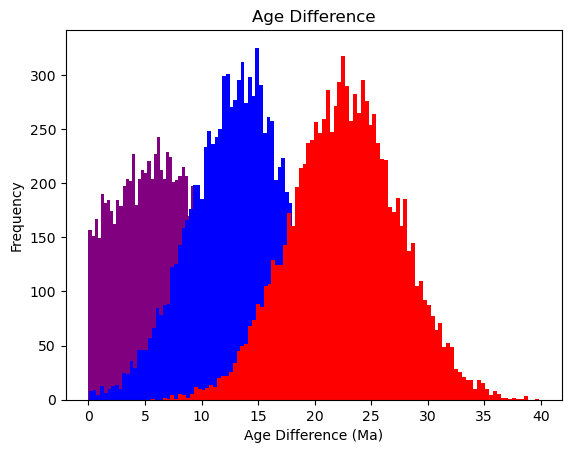

In [11]:
#plot age histogram
y=statistics.mean(agedif)
z=statistics.stdev(agedif)
f=statistics.mean(agedif2)
g=statistics.stdev(agedif2)
k=statistics.mean(agedif3)
l=statistics.stdev(agedif3)
print("{:.2f}".format(y),"Mean Age Difference 1")
print("{:.2f}".format(z),"Standard Deviation 1")
print("{:.2f}".format(f),"Mean Age Difference 2")
print("{:.2f}".format(g),"Standard Deviation 2")
print("{:.2f}".format(k),"Mean Age Difference 3")
print("{:.2f}".format(l),"Standard Deviation 3")
# Create histogram
plt.hist(agedif, color = "purple",bins=100)
plt.hist(agedif2, color= "blue", bins=100)
plt.hist(agedif3, color="red", bins=100)
# Set title and axis labels
plt.title('Age Difference')
plt.xlabel('Age Difference (Ma)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('agedifhist.svg')
# Display the histogram
plt.show()

254.94 Mean Rate 1 (cm/yr)
7412.35 Standard Deviation 1
28.06 Mean Rate 2 (cm/yr)
78.84 Standard Deviation 2
20.44 Mean Rate 3 (cm/yr)
5.46 Standard Deviation 3


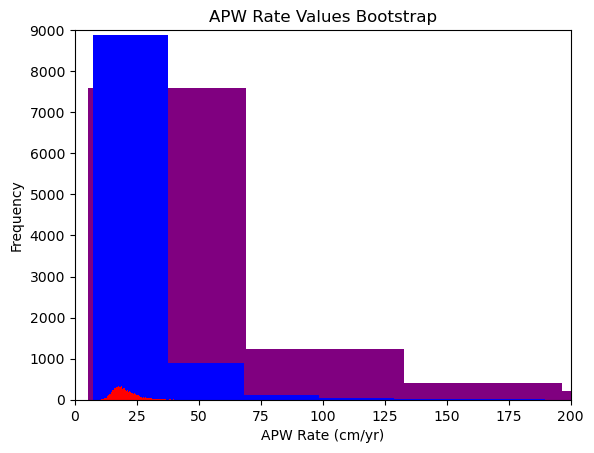

In [12]:
#plot histograms of great-circle distance for each bootstrapped pair
y=statistics.mean(rate2)
z=statistics.stdev(rate2)
f=statistics.mean(rate4)
g=statistics.stdev(rate4)
k=statistics.mean(rate6)
l=statistics.stdev(rate6)
print("{:.2f}".format(y),"Mean Rate 1 (cm/yr)")
print("{:.2f}".format(z),"Standard Deviation 1")
print("{:.2f}".format(f),"Mean Rate 2 (cm/yr)")
print("{:.2f}".format(g),"Standard Deviation 2")
print("{:.2f}".format(k),"Mean Rate 3 (cm/yr)")
print("{:.2f}".format(l),"Standard Deviation 3")
plt.xlim(0,200)
plt.ylim(0,9000)
# Create histogram
plt.hist(rate2, color = "purple",bins=8000)
plt.hist(rate4, color = "blue",bins=200)
plt.hist(rate6, color="red", bins=200)
# Set title and axis labels
plt.title('APW Rate Values Bootstrap')
plt.xlabel('APW Rate (cm/yr)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('APWratehist.svg')
# Display the histogram
plt.show()

In [13]:
#calculate median value for APW rate when populations show wide variation
def median(numbers):
    sorted_numbers = sorted(numbers)
    length = len(sorted_numbers)
    middle = length // 2

    if length % 2 == 0:
        return (sorted_numbers[middle - 1] + sorted_numbers[middle]) / 2
    else:
        return sorted_numbers[middle]

def read_numbers_from_file(file_name):
    with open(file_name, 'r') as file:
        numbers = [float(line.strip()) for line in file.readlines()]
    return numbers

# Example usage
file_name = 'rate2.txt'
numbers = read_numbers_from_file(file_name)
print("Median rate (cm/yr):", median(numbers))

Median rate (cm/yr): 35.93357908147587


23.11 Great Circle Distance 1
4.62 Standard Deviation 1
26.76 Great Circle Distance 2
3.78 Standard Deviation 2
39.67 Great Circle Distance 3
3.54 Standard Deviation 3


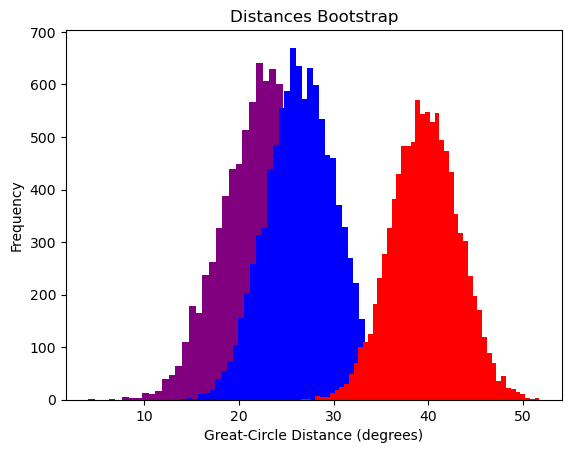

In [14]:
#plot histograms of great-circle distance for each bootstrapped pair
y=statistics.mean(distances)
z=statistics.stdev(distances)
f=statistics.mean(distances2)
g=statistics.stdev(distances2)
k=statistics.mean(distances3)
l=statistics.stdev(distances3)
print("{:.2f}".format(y/111.1),"Great Circle Distance 1")
print("{:.2f}".format(z/111.1),"Standard Deviation 1")
print("{:.2f}".format(f/111.1),"Great Circle Distance 2")
print("{:.2f}".format(g/111.1),"Standard Deviation 2")
print("{:.2f}".format(k/111.1),"Great Circle Distance 3")
print("{:.2f}".format(l/111.1),"Standard Deviation 3")
# Create histogram
plt.hist(distances/111.1, color = "purple",bins=50)
plt.hist(distances2/111.1, color = "blue",bins=50)
plt.hist(distances3/111.1, color = "red",bins=50)
# Set title and axis labels
plt.title('Distances Bootstrap')
plt.xlabel('Great-Circle Distance (degrees)')
plt.ylabel('Frequency')
#####Put Figure File save location next####
plt.savefig('distances.svg')
# Display the histogram
plt.show()


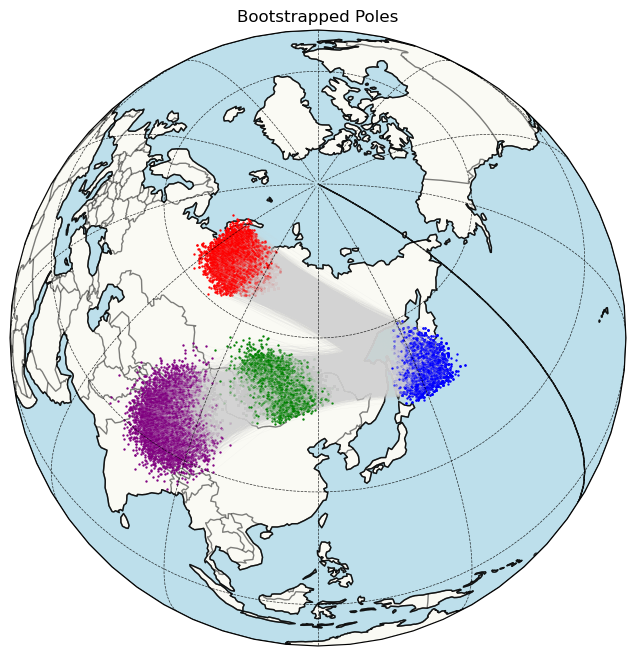

In [15]:
# Plot the great circles and lat, long pairs on an orthographic map
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=120, central_latitude=60))

ax.add_feature(cfeature.LAND, edgecolor='black',  alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', edgecolor='black', alpha=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.5)
# Add graticules (latitude and longitude lines)
ax.gridlines(xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30), linewidth=0.5, linestyle='--', color='black', alpha=0.8)

for i in range(data_array1.shape[0]):
    lat1, lon1 = data_array1[i]
    lat2, lon2 = data_array2[i]
    lat3, lon3 = data_array3[i]
    lat4, lon4 = data_array4[i]

    ax.plot([lon1, lon2], [lat1, lat2],color="lightgrey",
            transform=ccrs.Geodetic(),
            linewidth=.05)
    ax.plot([lon2, lon3], [lat2, lat3],color="lightgrey",
            transform=ccrs.Geodetic(),
            linewidth=.05)
    ax.plot([lon3, lon4], [lat3, lat4],color="lightgrey",
            transform=ccrs.Geodetic(),
            linewidth=.05)

    ax.plot(lon1, lat1, 'o', markersize=0.7, color='purple', transform=ccrs.PlateCarree())
    ax.plot(lon2, lat2, 'o', markersize=0.7, color='green', transform=ccrs.PlateCarree())
    ax.plot(lon3, lat3, 'o', markersize=0.7, color='blue', transform=ccrs.PlateCarree())
    ax.plot(lon4, lat4, 'o', markersize=0.7, color='red', transform=ccrs.PlateCarree())

    ax.set_global()
plt.title('Bootstrapped Poles')
plt.savefig('TPWestimate.svg')
plt.show()

820.07 Mean Age
4.98 Standard Deviation
812.99 Age
1.50 Standard Deviation
73.62 Paleolatitude
3.93 Standard Deviation
52.35 Paleolatitude
2.70 Standard Deviation


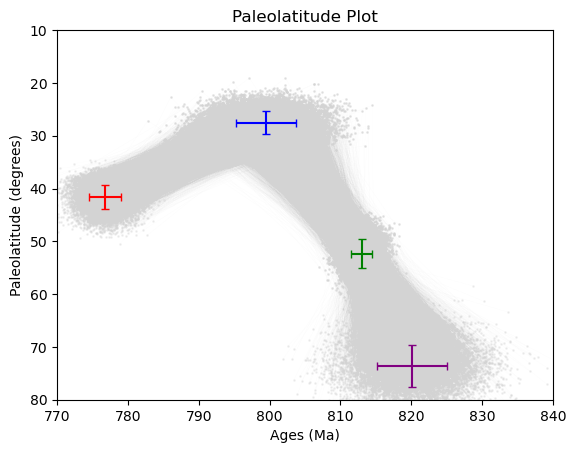

-33.06 cm/year latitudinal rate


<Figure size 640x480 with 0 Axes>

In [16]:
# Read x and y values from separate files
def read_values(file_path):
    with open(file_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
    return values

x1_file_path = 'c:\\users\\jmeer\\ages_1f.txt'
x2_file_path = 'c:\\users\\jmeer\\ages_2f.txt'
x3_file_path = 'c:\\users\\jmeer\\ages_3f.txt'
x4_file_path = 'c:\\users\\jmeer\\ages_4f.txt'
y1_file_path = 'c:\\users\\jmeer\\plat_1f.txt'
y2_file_path = 'c:\\users\\jmeer\\plat_2f.txt'
y3_file_path = 'c:\\users\\jmeer\\plat_3f.txt'
y4_file_path = 'c:\\users\\jmeer\\plat_4f.txt'

x1 = read_values(x1_file_path)
x2 = read_values(x2_file_path)
x3 = read_values(x3_file_path)
x4 = read_values(x4_file_path)
y1 = read_values(y1_file_path)
y2 = read_values(y2_file_path)
y3 = read_values(y3_file_path)
y4 = read_values(y4_file_path)



p=statistics.mean(x1)
t=statistics.stdev(x1)
p2=statistics.mean(x2)
t2=statistics.stdev(x2)
r=statistics.mean(y1)
s=statistics.stdev(y1)
r2=statistics.mean(y2)
s2=statistics.stdev(y2)
q=statistics.mean(x3)
l=statistics.stdev(x3)
q2=statistics.mean(y3)
l2=statistics.stdev(y3)
a=statistics.mean(x4)
b=statistics.mean(y4)
a2=statistics.stdev(x4)
b2=statistics.stdev(y4)
print("{:.2f}".format(p), "Mean Age")
print("{:.2f}".format(t),"Standard Deviation")
print("{:.2f}".format(p2),"Age")
print("{:.2f}".format(t2),"Standard Deviation")
print("{:.2f}".format(r),"Paleolatitude")
print("{:.2f}".format(s),"Standard Deviation")
print("{:.2f}".format(r2),"Paleolatitude")
print("{:.2f}".format(s2),"Standard Deviation")

###################
# Plotting values
mean_x1 = p
std_dev_x1 = t
mean_x2 = p2
std_dev_x2 = t2
mean_y1 = r
std_dev_y1 = s
mean_y2 = r2
std_dev_y2 = s2
mean_x3= q
std_dev_x3=l
mean_y3= q2
std_dev_y3=l2
mean_x4=a
std_dev_x4=a2
mean_y4=b
std_dev_y4=b2

# Plot and connect points
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], marker='o', markersize=0.9, color='lightgrey', linewidth=0.05, linestyle='-',alpha=.3)
for i in range(len(x3)):
    plt.plot([x2[i], x3[i]], [y2[i], y3[i]], marker='o', markersize=0.9, color='lightgrey', linewidth=0.05, linestyle='-',alpha=.3)
for i in range(len(x4)):
    plt.plot([x3[i], x4[i]], [y3[i], y4[i]], marker='o', markersize=0.9, color='lightgrey', linewidth=0.05, linestyle='-',alpha=.3)
# Set plot title and labels
plt.title('Paleolatitude Plot')
plt.xlabel('Ages (Ma)')
plt.ylabel('Paleolatitude (degrees)')
plt.xlim(840,770)
plt.ylim(80,10)
# Show legend
#plt.legend()

#invert x-axis
plt.gca().invert_xaxis()

#plot error bars
plt.errorbar(mean_x1, mean_y1, xerr=std_dev_x1, yerr=std_dev_y1, linestyle='none', ecolor='purple', label='Error Bars', capsize=3)
plt.errorbar(mean_x2, mean_y2, xerr=std_dev_x2, yerr=std_dev_y2, linestyle='none', ecolor='green', label='Error Bars', capsize=3)
plt.errorbar(mean_x3, mean_y3, xerr=std_dev_x3, yerr=std_dev_y3, linestyle='none', ecolor='blue', label='Error Bars', capsize=3)
plt.errorbar(mean_x4, mean_y4, xerr=std_dev_x4, yerr=std_dev_y4, linestyle='none', ecolor='red', label='Error Bars', capsize=3)
# Display plot
plt.show()
#####Put Figure File save location next####
plt.savefig('latitudeplot.svg')
#Calculate Mean Latitudinal Drift Rate
Drate=((r-r2)/(p2-p))*11
print("{:.2f}".format(Drate),"cm/year latitudinal rate")